In [1]:
import pandas as pd
import numpy as np
from datetime import date, time, datetime, timedelta

import plotly.graph_objects as go

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter,ScalarFormatter

In [2]:
PATH = r'D:\WORKS\PolimerSolve\Comsol\tables\1D'

In [8]:
def df_from_comsol(
    name,
    from_name=r'\out.csv',
    temp_name=r'\temp.csv',
):
    with open(PATH + from_name, 'r') as file:
        lines = file.readlines()

    with open(PATH + temp_name, 'w') as file:
        for line in lines[4:]:
            file.write(line)
    df = pd.read_csv(PATH + r'\temp.csv')
    df = df.rename(
        columns={
            df.columns[0]: df.columns[0].replace('% ', ''),
            'Time=0.001, timeint(0, 1E-4, D)': 'target',
        })
    df['name'] = name
    df['date'] = datetime.now().replace(second=0, microsecond=0)
    return df


def add_notes(from_name=r'\out.csv'):
    standart_values = {
        'k1': 1E+9,
        'k2': 1.00E+09,
        'k3': 1.00E+09,
        'k4': 1.00E+09,
        'k5': 2000,
        'k6': 2.00E+00,
        'k7': 0.05,
        'k8': 1.00E+00,
        'k9': 0.001,
        'k10': 1.00E+09,
        'k11': 1.00E-05,
        'K2': 2.00E-06,
        'K4': 0.05,
        'light': 1.00E-04,
    }

    name = ''
    while True:
        name = input('Name (q for quit): ')
        if (name != '') and (name != 'q'):
            try:
                old_df = pd.read_excel(PATH + r'\base.xlsx', index_col=0)
            except FileNotFoundError:
                old_df = pd.DataFrame(
                    {key: [None]
                     for key in standart_values.keys()})
                old_df = old_df.drop(index=0)

            new_df = pd.concat(
                [old_df, df_from_comsol(name, from_name=from_name)],
                ignore_index=True,
            )
            new_df = new_df.fillna(standart_values)
            new_df.to_excel(PATH + r'\base.xlsx')

            return new_df, old_df
        elif name == 'q':
            break

# Add notes

In [15]:
base, old_df = add_notes()

# Check all notes

In [16]:
df = pd.read_excel(PATH + r'\base.xlsx', index_col=0)
df['name'].unique()

array(['start', 'continue', 'test'], dtype=object)

In [17]:
df_show = df
df_show = df[df['name']=='test']

fig = go.Figure()
fig.update_layout(margin={'r': 0, 'l': 0, 't': 0, 'b': 0})
fig.add_traces(
    go.Scatter(
        x=df_show['light'],
        y=df_show['target'],
        text=df_show['name'],
        mode='markers',
        hovertemplate='light: %{x:.1e}<br>integral: %{y:.2s} <br>%{text}',
        name='',
    ))

Max value = 1.55E-07
Light     = 3.70E-05


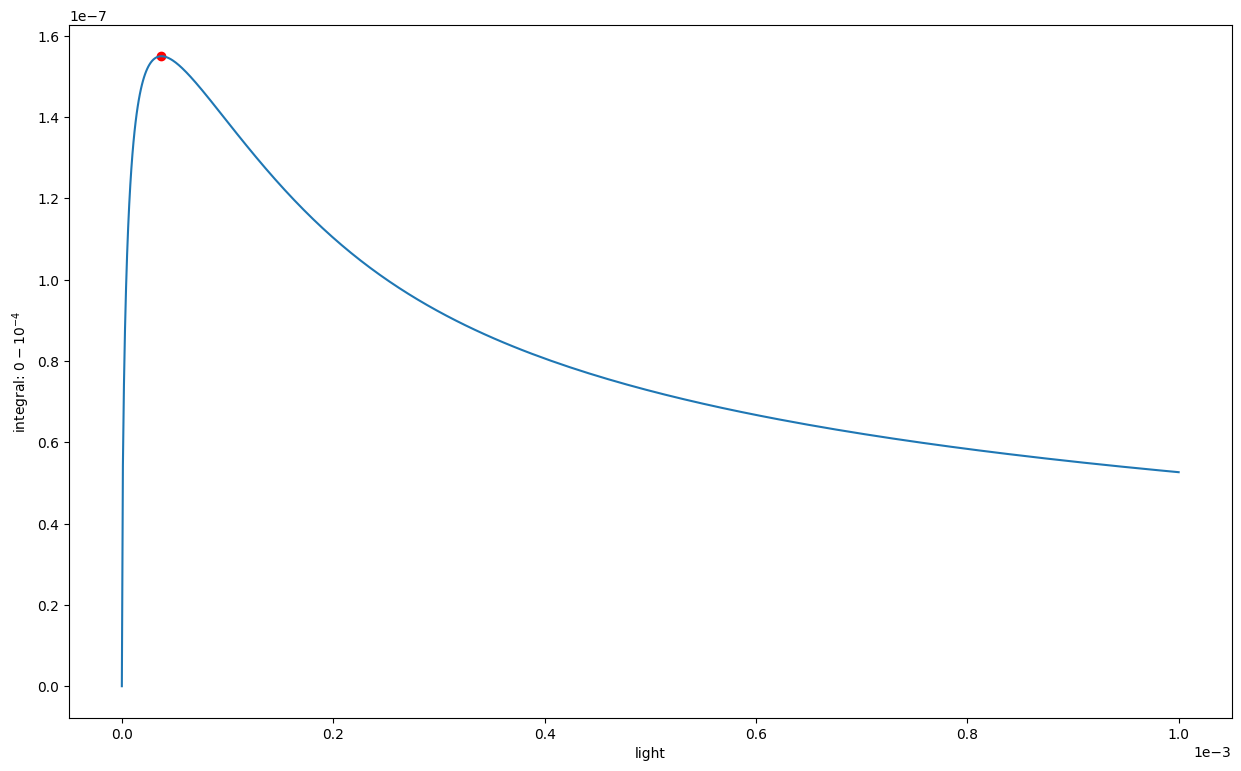

In [66]:
fig, ax = plt.subplots(figsize=(15, 9))
ax.plot(
    df_show['light'],
    df_show['target'],
)
ax.set_xlabel('light')
ax.set_ylabel('integral: $0 - 10^{-4}$')
df_max = df_show[df_show['target'] == df_show['target'].max()]
ax.scatter(
    df_max['light'],
    df_max['target'],
    c='r',
)
max_value = df_max['target'].iloc[0]
max_light = df_max['light'].iloc[0]
print(f'Max value = {max_value:.2E}\nLight     = {max_light:.2E}')
scal_form = ScalarFormatter(1)
scal_form.set_powerlimits((0, 0.1))
ax.xaxis.set_major_formatter(scal_form)